In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My \Drive/MHA/ML Fall 2022/HW/HW4

Mounted at /content/gdrive
/content/gdrive/My Drive/MHA/ML Fall 2022/HW/HW4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('data.csv')
data = data.set_index('Unnamed: 0')
data

,x,y
Unnamed: 0,,
0,0.874365,5.926937
1,-3.185937,2.356974
2,-3.472231,3.131644
3,0.589067,4.318645
4,-2.955939,2.162257
...,...,...
395,-0.065350,5.021496
396,0.097164,4.883143
397,0.844816,0.478342


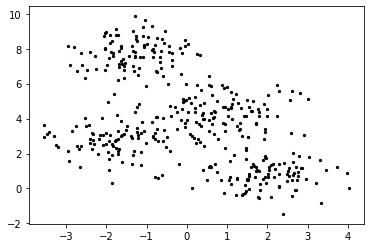

In [ ]:
plt.scatter(data['x'], data['y'], s=5, color='black')
plt.show()

As you know we have set of points, so we should use Euclidean distance as our similarity measuring method.
We give our unclassified sample to this method as well as list of our centroids, so we calculate distance of this sample from all centroids and if we have K classes (clusters), this method give us a list which contains K numbers displaying distance, then we'll label this sample with the index of the minimum distance in this list.

In [ ]:
def euclidean_distance(sample, centroids):
  sample = sample.reshape(1,-1)
  sample_distance_from_centroids = np.sqrt(np.sum((sample - centroids)**2, axis=1))
  return sample_distance_from_centroids

### **K-means method**
this method which do the fiting task, needs 3 inputs : number of clusters (k), our dataset (train) and maximum number of iterations for setting the limit of k-means iterations.

In [ ]:
def K_means(k, train, max_iteration):
        index = np.random.choice(len(train), size = k, replace = False)
        # print(f'index:{index}')
        #we have k unique numbers between 0 to len of train set, so our k random
        #centroids for initialization will be selected easily via index[]
        current_centroids = train[index]
        #now we have our random k centroids in current centroids list
        iteration = 0
        last_itr_centroids = []
        clustered_samples = []
        is_centroids_changed = True #this boolean needed to check convergent
        while is_centroids_changed and iteration < max_iteration:
            #in each iteration we should re-cluster our samples
            clustered_samples = []
            for i in range(k):
              clustered_samples.append([])  
            for i in range(len(train)):
                #we find out the nearest centroid (in current centroids) to our
                #un-clustered sample, and then we add the sample to that cluster
                sample = train[i]
                distances = euclidean_distance(sample, current_centroids)
                clustered_samples[np.argmin(distances)].append(list(sample))

            #now we should update the centroids, if no change happens, we did meet
            #convergence and no more iteration needed    
            last_itr_centroids = current_centroids.copy()
            for i, cluster in enumerate(clustered_samples):
              current_centroids[i] = np.mean(np.array(cluster), axis=0)
            
            #one possible happening is that in our new clusters, some clusters 
            #have no member, these clusters will add some Nan values in future
            #calculations, so we should roll back this centroids to older ones   
            for ind, centroid in enumerate(current_centroids):
                if np.isnan(centroid).any():
                    current_centroids[ind] = last_itr_centroids[ind]        
            #if any of the centroids changed, it means that we still didn't meet
            #convergence in our fiting, so we should carry on until convergence occurs        
            is_centroids_changed = np.not_equal(current_centroids, last_itr_centroids).any()
            # print(is_centroids_changed)
            # print(f'cur:{current_centroids}')
            # print(f'lst:{last_itr_centroids}')
            iteration = iteration + 1
        return current_centroids, clustered_samples, iteration

Testing implemented K-means which is part 1.1 in HW4

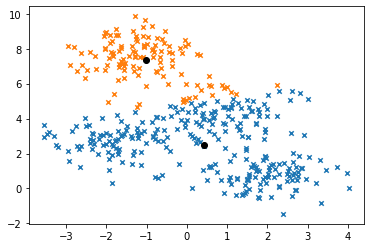

convergence after 11 iterations


In [ ]:
k = 2
centroids, clustered_samples, itr = K_means(k = k, train = data.values, max_iteration = 30)
for i in range(k):
  cluster = np.array(clustered_samples[i])
  plt.scatter(cluster.T[0], cluster.T[1], s = 20, marker = 'x')
plt.scatter(centroids.T[0], centroids.T[1], marker = 'o', color = 'Black')
plt.show()
print(f'convergence after {itr} iterations')

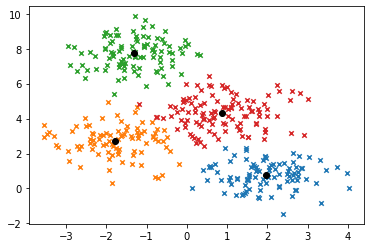

convergence after 10 iterations


In [ ]:
k = 4
centroids, clustered_samples, itr = K_means(k = k, train = data.values, max_iteration = 30)
for i in range(k):
  cluster = np.array(clustered_samples[i])
  plt.scatter(cluster.T[0], cluster.T[1], s = 20, marker = 'x')
plt.scatter(centroids.T[0], centroids.T[1], marker = 'o', color = 'Black')
plt.show()
print(f'convergence after {itr} iterations')

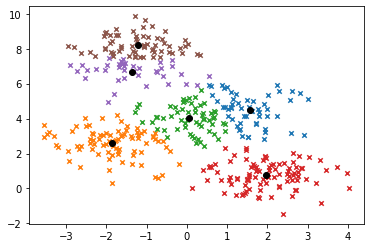

convergence after 9 iterations


In [ ]:
k = 6
centroids, clustered_samples, itr = K_means(k = k, train = data.values, max_iteration = 30)
for i in range(k):
  cluster = np.array(clustered_samples[i])
  plt.scatter(cluster.T[0], cluster.T[1], s = 20, marker = 'x')
plt.scatter(centroids.T[0], centroids.T[1], marker = 'o', color = 'Black')
plt.show()
print(f'convergence after {itr} iterations')

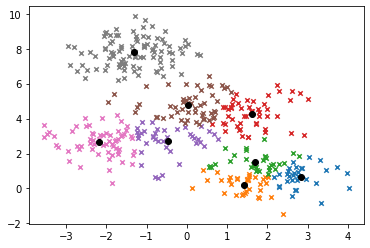

convergence after 16 iterations


In [ ]:
k = 8
centroids, clustered_samples, itr = K_means(k = k, train = data.values, max_iteration = 30)
for i in range(k):
  cluster = np.array(clustered_samples[i])
  plt.scatter(cluster.T[0], cluster.T[1], s = 20, marker = 'x')
plt.scatter(centroids.T[0], centroids.T[1], marker = 'o', color = 'Black')
plt.show()
print(f'convergence after {itr} iterations')

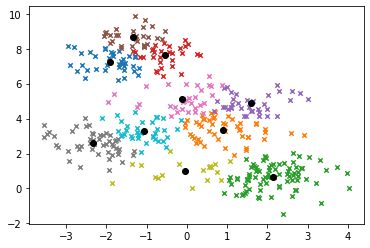

convergence after 14 iterations


In [ ]:
k = 10
centroids, clustered_samples, itr = K_means(k = k, train = data.values, max_iteration = 30)
for i in range(k):
  cluster = np.array(clustered_samples[i])
  plt.scatter(cluster.T[0], cluster.T[1], s = 20, marker = 'x')
plt.scatter(centroids.T[0], centroids.T[1], marker = 'o', color = 'Black')
plt.show()
print(f'convergence after {itr} iterations')

Question 1.2 which is compressing colors via K-means 

In [ ]:
import matplotlib.image as mpimg

(-0.5, 127.5, 127.5, -0.5)

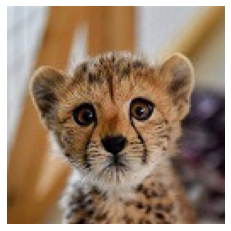

In [ ]:
img = mpimg.imread('pirooz.jpg')
plt.imshow(img)
plt.axis(False)

we'll have a 3D array which has 128 rows and 128 columns, each element is a list of 3 integers stands for RGB of each pixel in picture, we reshape it to have a (128*128) x 3 2D array, without change type to float, overflow occurs in K-means, after fiting we change type again to int and then assign new values to pixels.

In [ ]:
img_arr = np.array(img).astype(float)
img_arr = img_arr.reshape(-1,3)
img_arr

array([[214., 223., 232.],
       [213., 222., 231.],
       [212., 221., 230.],
       ...,
       [103.,  92.,  90.],
       [100.,  88.,  88.],
       [ 98.,  86.,  86.]])

In [ ]:
k = 8
centroids, clustered_samples, itr = K_means(k = k, train = img_arr, max_iteration = 500)

convergence occured after 53 iterations


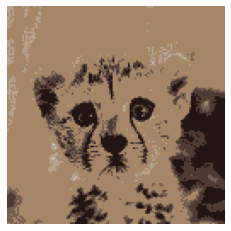

In [ ]:
compressed_img = img_arr.copy()
for i, color_group in enumerate(clustered_samples):
  for pixel in color_group:
    compressed_img[(img_arr == pixel).T[0].T] = centroids[i]
compressed_img = compressed_img.reshape(128, 128, 3).astype(int)
plt.imshow(compressed_img)
plt.axis(False)
print(f'convergence occured after {itr} iterations')

In [ ]:
k = 16
centroids, clustered_samples, itr = K_means(k = k, train = img_arr, max_iteration = 500)

convergence occured after 60 iterations


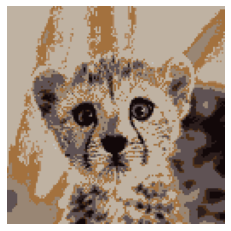

In [ ]:
compressed_img = img_arr.copy()
for i, color_group in enumerate(clustered_samples):
  for pixel in color_group:
    compressed_img[(img_arr == pixel).T[0].T] = centroids[i]
compressed_img = compressed_img.reshape(128, 128, 3).astype(int)
plt.imshow(compressed_img)
plt.axis(False)
print(f'convergence occured after {itr} iterations')

In [ ]:
k = 32
centroids, clustered_samples, itr = K_means(k = k, train = img_arr, max_iteration = 500)

convergence occured after 69 iterations


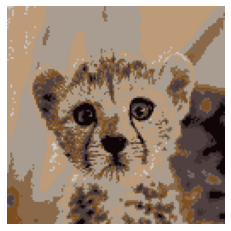

In [ ]:
compressed_img = img_arr.copy()
for i, color_group in enumerate(clustered_samples):
  for pixel in color_group:
    compressed_img[(img_arr == pixel).T[0].T] = centroids[i]
compressed_img = compressed_img.reshape(128, 128, 3).astype(int)
plt.imshow(compressed_img)
plt.axis(False)
print(f'convergence occured after {itr} iterations')

In [ ]:
k = 64
centroids, clustered_samples, itr = K_means(k = k, train = img_arr, max_iteration = 500)

convergence occured after 94 iterations


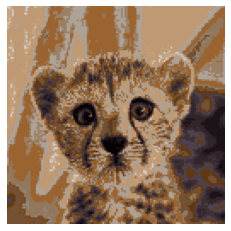

In [ ]:
compressed_img = img_arr.copy()
for i, color_group in enumerate(clustered_samples):
  for pixel in color_group:
    compressed_img[(img_arr == pixel).T[0].T] = centroids[i]
compressed_img = compressed_img.reshape(128, 128, 3).astype(int)
plt.imshow(compressed_img)
plt.axis(False)
print(f'convergence occured after {itr} iterations')

In [ ]:
k = 128
centroids, clustered_samples, itr = K_means(k = k, train = img_arr, max_iteration = 500)

convergence occured after 61 iterations


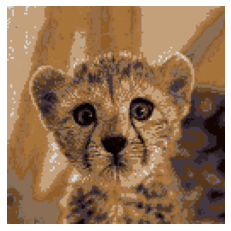

In [ ]:
compressed_img = img_arr.copy()
for i, color_group in enumerate(clustered_samples):
  for pixel in color_group:
    compressed_img[(img_arr == pixel).T[0].T] = centroids[i]
compressed_img = compressed_img.reshape(128, 128, 3).astype(int)
plt.imshow(compressed_img)
plt.axis(False)
print(f'convergence occured after {itr} iterations')

In [ ]:
k = 256
centroids, clustered_samples, itr = K_means(k = k, train = img_arr, max_iteration = 500)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


convergence occured after 34 iterations


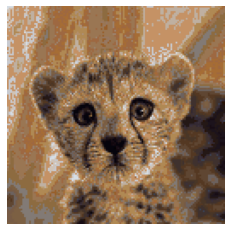

In [ ]:
compressed_img = img_arr.copy()
for i, color_group in enumerate(clustered_samples):
  for pixel in color_group:
    compressed_img[(img_arr == pixel).T[0].T] = centroids[i]
compressed_img = compressed_img.reshape(128, 128, 3).astype(int)
plt.imshow(compressed_img)
plt.axis(False)
print(f'convergence occured after {itr} iterations')